In [ ]:
#! pip install finance-datareader

In [2]:
import pandas as pd
import numpy as np
import talib as ta
import QuantLib as ql
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import yfinance as yf
import pandas_datareader as pdr
import FinanceDataReader as fdr
fdr.__version__

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [4]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2016, 2, 19)
end = datetime.datetime(2016, 3, 4)

In [5]:
gs = web.DataReader("078930.KS", "yahoo", start, end)

In [6]:
gs.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-19,51100,49950,50300,50600,301800,40053.960938
2016-02-22,50800,49850,50300,50400,153961,39895.648438
2016-02-23,53000,50800,50800,52800,431934,41795.445312
2016-02-24,53500,51900,52000,53500,259616,42349.546875
2016-02-25,54700,52700,53900,53900,170839,42666.175781


<b> International Commodity Price
https://finance.yahoo.com/commodities

# Benchmark Oils

## Brent Crude
“Brent” actually refers to oil from four different fields in the North Sea. Crude from this region is light and sweet, making them ideal for the refining of diesel fuel, gasoline, and other high-demand products. And because the supply is waterborne, it’s easy to transport to distant locations.


In [7]:
import yfinance as yf

Crude_Oil_Nov22 = yf.Ticker("CL=F")
Crude_Oil_Nov22 = Crude_Oil_Nov22.history(period='max')
Crude_Oil_Nov22.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0,0
2000-08-24,31.900000,32.240002,31.400000,31.629999,72978,0,0
2000-08-25,31.700001,32.099998,31.320000,32.049999,44601,0,0
2000-08-28,32.040001,32.919998,31.860001,32.869999,46770,0,0
2000-08-29,32.820000,33.029999,32.560001,32.720001,49131,0,0


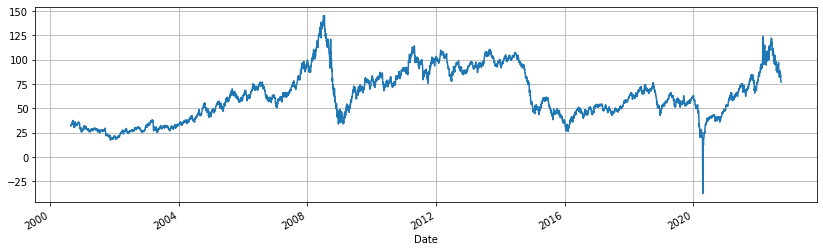

In [8]:
Crude_Oil_Nov22['Close'].plot()
plt.show()

In [9]:
brent_crude = pd.read_csv('./brent.csv')
brent_crude.head(3)

,DATE,POILBREUSDM
0,1990-01-01,20.989130
1,1990-02-01,19.702500
2,1990-03-01,18.465909


In [10]:
brent_crude.set_index('DATE')

,POILBREUSDM
DATE,
1990-01-01,20.989130
1990-02-01,19.702500
1990-03-01,18.465909
1990-04-01,16.926190
1990-05-01,16.671739
...,...
2022-03-01,112.440000
2022-04-01,106.155714
2022-05-01,112.113636


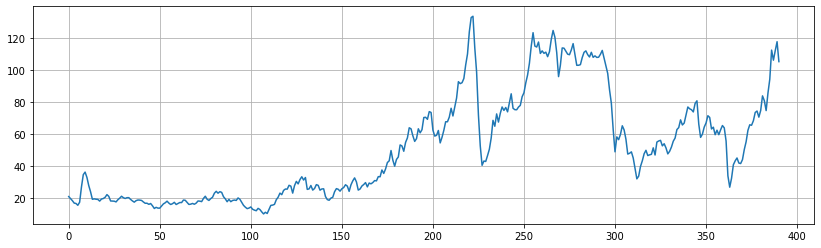

In [29]:
brent_crude['POILBREUSDM'].plot()
plt.show()

### West Texas Intermediate (WTI)
WTI refers to oil extracted from wells in the U.S. and sent via pipeline to Cushing, Oklahoma. The fact that supplies are land-locked is one of the drawbacks to West Texas crude as it’s relatively expensive to ship to certain parts of the globe. The product itself is very light and very sweet, making it ideal for gasoline refining, in particular. WTI continues to be the main benchmark for oil consumed in the United States.


In [12]:
WTI = pd.read_csv('./WTI지수.csv')
WTI.head(3)

,DATE,DCOILWTICO
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53


In [13]:
brent_crude.set_index('DATE')

,POILBREUSDM
DATE,
1990-01-01,20.989130
1990-02-01,19.702500
1990-03-01,18.465909
1990-04-01,16.926190
1990-05-01,16.671739
...,...
2022-03-01,112.440000
2022-04-01,106.155714
2022-05-01,112.113636


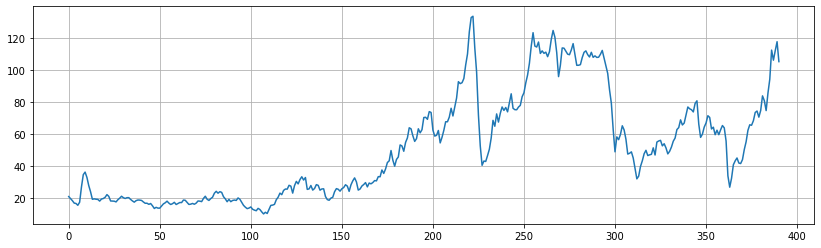

In [14]:
brent_crude['POILBREUSDM'].plot()
plt.show()

### Dubai/Oman
This Middle Eastern crude is a useful reference for oil of a slightly lower grade than WTI or Brent. A “basket” product consisting of crude from Dubai, Oman or Abu Dhabi, it’s somewhat heavier and has higher sulfur content, putting it in the “sour” category. Dubai/Oman is the main reference for Persian Gulf oil delivered to the Asian market.


In [15]:
DUBAI = pd.read_csv('./두바이유.csv')
DUBAI.head(3)

,DATE,POILDUBUSDM
0,1990-01-01,17.501739
1,1990-02-01,16.681500
2,1990-03-01,15.755909


In [16]:
DUBAI.set_index('DATE')

,POILDUBUSDM
DATE,
1990-01-01,17.501739
1990-02-01,16.681500
1990-03-01,15.755909
1990-04-01,14.250476
1990-05-01,14.647826
...,...
2022-03-01,107.587826
2022-04-01,102.755238
2022-05-01,107.861364


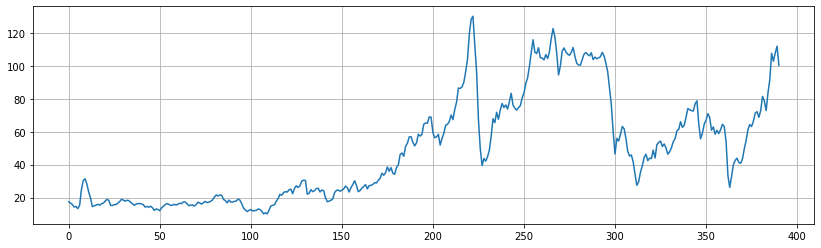

In [17]:
DUBAI['POILDUBUSDM'].plot()
plt.show()

### Heating Oil

In [18]:
Heating_Oil_Oct22 = yf.Ticker("HO=F")
Heating_Oil_Oct22 = Heating_Oil_Oct22.history(period='max')
Heating_Oil_Oct22.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-01,0.985,0.991,0.9705,0.9764,14679,0,0
2000-09-05,0.995,0.998,0.9750,0.9797,17365,0,0
2000-09-06,0.985,1.000,0.9810,0.9966,18879,0,0
2000-09-07,0.990,1.030,0.9880,1.0295,23851,0,0


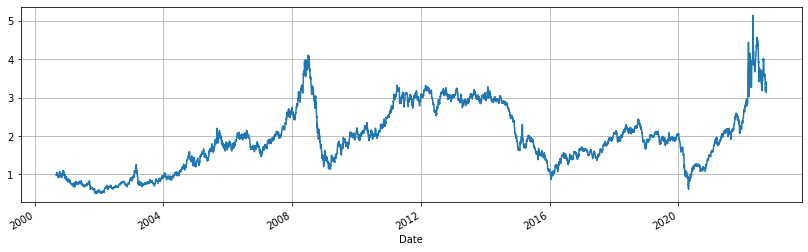

In [19]:
Heating_Oil_Oct22['Close'].plot()
plt.show()

### Natural Gas

In [20]:
Natural_Gas_Oct22 = yf.Ticker("NG=F")
Natural_Gas_Oct22 = Natural_Gas_Oct22.history(period='max')
Natural_Gas_Oct22.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,4.65,4.815,4.63,4.805,34954,0,0
2000-08-31,4.82,4.870,4.74,4.780,25787,0,0
2000-09-01,4.75,4.860,4.75,4.835,113,0,0
2000-09-05,4.85,4.975,4.84,4.960,26096,0,0


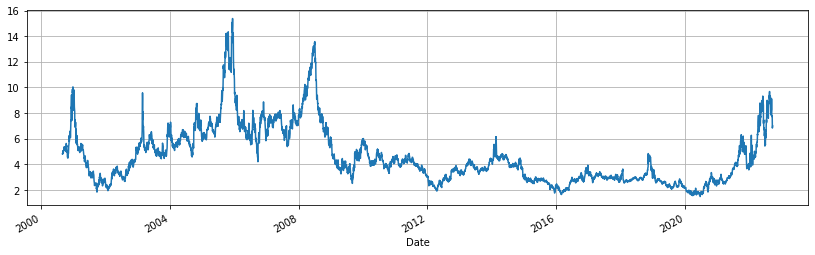

In [21]:
Natural_Gas_Oct22['Close'].plot()
plt.show()

# US oil prices turn negative as demand dries up

That means oil producers are paying buyers to take the commodity off their hands over fears that storage capacity could run out in May.
Demand for oil has all but dried up as lockdowns across the world have kept people inside.
As a result, oil firms have resorted to renting tankers to store the surplus supply and that has forced the price of US oil into negative territory.
The price of a barrel of West Texas Intermediate (WTI), the benchmark for US oil, fell as low as minus $37.63 a barrel.

In [22]:
Crude_Oil_Nov22[(Crude_Oil_Nov22['Close'] <= 0)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-04-20,17.73,17.85,-40.32,-37.630001,247947,0,0


In [23]:
oil_price_crisis_2020 = Crude_Oil_Nov22[(Crude_Oil_Nov22['Close'] <= 35) & (Crude_Oil_Nov22.index >= '20200106')]
oil_price_crisis_2020[:3]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-09,32.869999,34.880001,27.340000,31.129999,1774383,0,0
2020-03-10,30.370001,35.020000,30.200001,34.360001,1064632,0,0
2020-03-11,34.619999,36.349998,32.560001,32.980000,874646,0,0


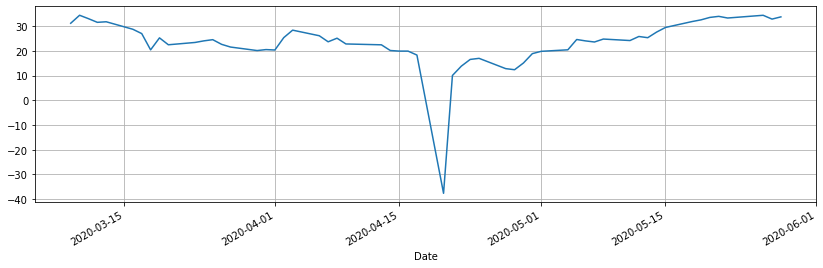

In [24]:
oil_price_crisis_2020['Close'].plot()
plt.show()

In [25]:
Crude_Oil_Nov22["close_pct_change"] = Crude_Oil_Nov22['Close'].pct_change(1) 
Crude_Oil_Nov22.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,close_pct_change
Date,,,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0,0,NaN


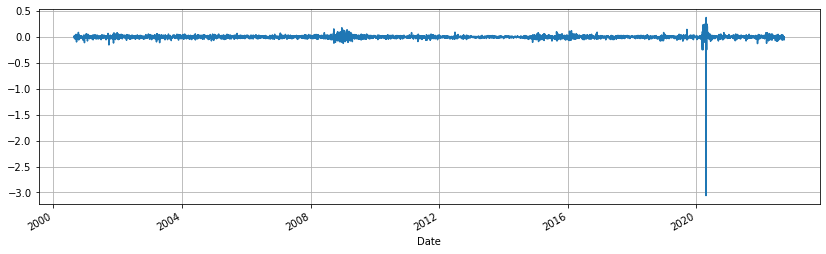

In [26]:
Crude_Oil_Nov22["close_pct_change"].plot()
plt.show()

# Historical price --> Mean & Stdev 

In [28]:
# future price
crude_oil_mean = Crude_Oil_Nov22['Close'].mean()
crude_oil_stdev = Crude_Oil_Nov22['Close'].std()
print(crude_oil_mean, crude_oil_stdev)

63.36886444810319 25.90359953056317


In [41]:
# spot price... maybe?
crude_mean = brent_crude['POILBREUSDM'].mean()
crude_stdev = brent_crude['POILBREUSDM'].std()
print(crude_mean, crude_stdev)

50.88598404771772 32.757599080029635


In [42]:
# Natural gas
ng_mean = Natural_Gas_Oct22['Close'].mean()
ng_stdev = Natural_Gas_Oct22['Close'].std()
print(ng_mean, ng_stdev)

4.579513166976009 2.2643734171190353


# Brent Crude & Natural Gas -- 0.25

In [30]:
Crude_Oil_Nov22.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,close_pct_change
Date,,,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,79385,0,0,NaN


In [31]:
Natural_Gas_Oct22.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,4.65,4.815,4.63,4.805,34954,0,0


In [38]:
crude_ng = pd.concat( [Crude_Oil_Nov22['Close'], Natural_Gas_Oct22['Close']], axis=1)
crude_ng.dropna()

,Close,Close
Date,,
2000-08-30,33.400002,4.805
2000-08-31,33.099998,4.780
2000-09-01,33.380001,4.835
2000-09-05,33.799999,4.960
2000-09-06,34.950001,5.065
...,...,...
2022-09-20,84.449997,7.717
2022-09-21,82.940002,7.779
2022-09-22,83.489998,7.089


In [47]:
crude_ng.corr()

,Close,Close
Close,1.000000,0.252792
Close,0.252792,1.000000


In [27]:
crude_oil_volatility_mean = Crude_Oil_Nov22["close_pct_change"].mean() 
crude_oil_voliatility_stdev = Crude_Oil_Nov22["close_pct_change"].std() 
print(crude_oil_volatility_mean, crude_oil_voliatility_stdev)

-0.00016187482855044486 0.05182426303864934


# Making Commodities Index - 변동률

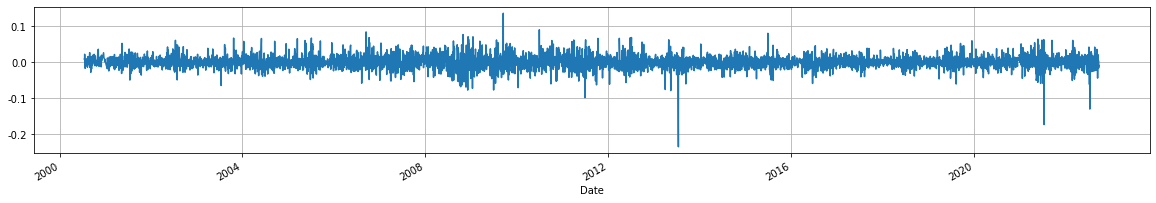

In [327]:
Corn_Futures_Dec2022["close_pct_change"] = Corn_Futures_Dec2022['Close'].pct_change(1) 
Corn_Futures_Dec2022.head(1)
Corn_Futures_Dec2022["close_pct_change"].plot()
plt.show()

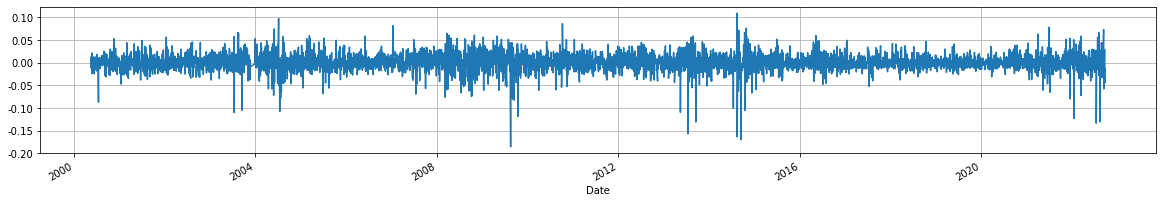

In [323]:
Soybean_Meal_Futures_Dec2022["close_pct_change"] = Soybean_Meal_Futures_Dec2022['Close'].pct_change(1) 
Soybean_Meal_Futures_Dec2022.head(1)
Soybean_Meal_Futures_Dec2022["close_pct_change"].plot()
plt.show()

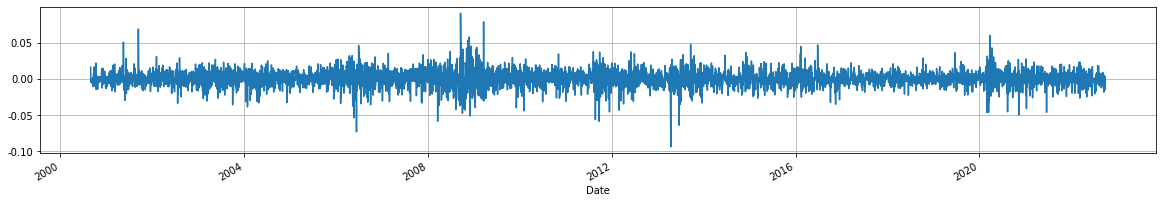

In [325]:
Gold["close_pct_change"] = Gold['Close'].pct_change(1) 
Gold.head(1)
Gold["close_pct_change"].plot()
plt.show()

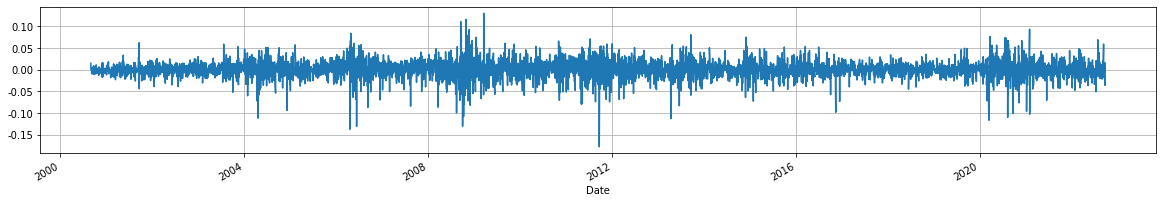

In [326]:
Silver["close_pct_change"] = Silver['Close'].pct_change(1) 
Silver.head(1)
Silver["close_pct_change"].plot()
plt.show()

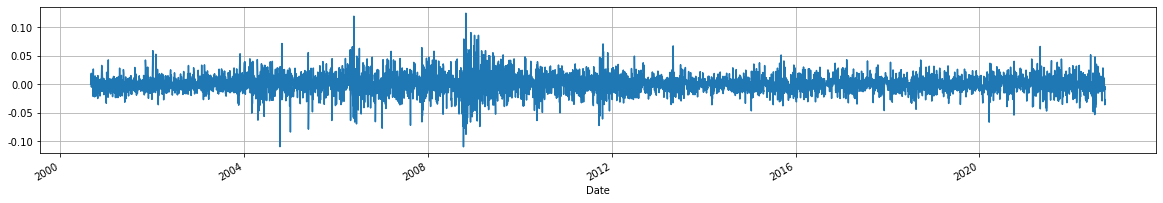

In [324]:
Copper_Dec22["close_pct_change"] = Copper_Dec22['Close'].pct_change(1) 
Copper_Dec22.head(1)
Copper_Dec22["close_pct_change"].plot()
plt.show()

# Grains Futures

## Corn

In [53]:
Corn_Futures_Dec2022 = yf.Ticker("ZC=F")
Corn_Futures_Dec2022 = Corn_Futures_Dec2022.history(period='max')
Corn_Futures_Dec2022.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-07-17,182.25,182.25,178.25,179.25,19385,0,0
2000-07-18,179.00,183.25,179.00,180.75,25205,0,0
2000-07-19,180.00,182.75,178.75,182.00,17126,0,0
2000-07-20,181.50,187.00,181.00,186.00,18742,0,0


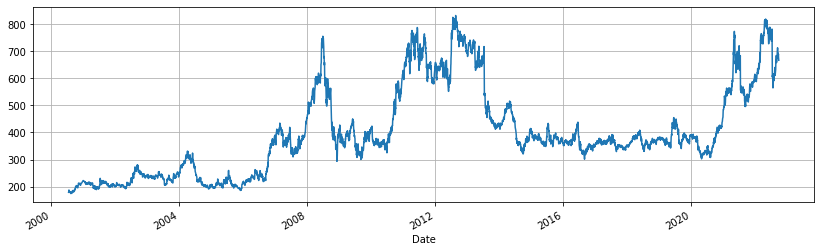

In [54]:
Corn_Futures_Dec2022['Close'].plot()
plt.show()

## Oat

In [68]:
Oat_Futures_Dec2022 = yf.Ticker("ZO=F")
Oat_Futures_Dec2022 = Oat_Futures_Dec2022.history(period='max')
Oat_Futures_Dec2022.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,117.25,117.5,116.75,116.75,2,0,0
2000-01-04,117.00,117.0,117.00,117.00,12,0,0
2000-01-05,117.25,117.5,116.75,116.75,6,0,0
2000-01-06,117.25,117.5,116.75,117.00,6,0,0


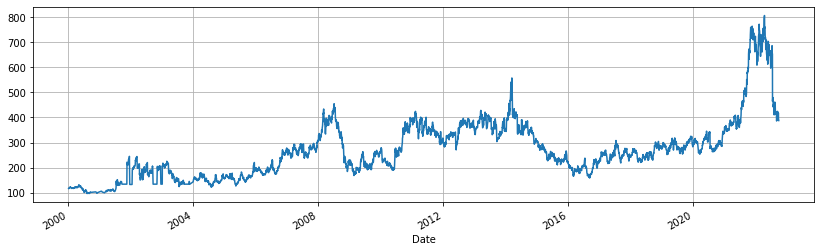

In [69]:
Oat_Futures_Dec2022['Close'].plot()
plt.show()

## Wheat

In [71]:
KC_HRW_Wheat_Futures_Dec2022 = yf.Ticker("KE=F")
KC_HRW_Wheat_Futures_Dec2022 = KC_HRW_Wheat_Futures_Dec2022.history(period='max')
KC_HRW_Wheat_Futures_Dec2022.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,296.0,296.0,292.00,293.75,4842,0,0
2000-09-22,293.5,297.0,293.25,295.50,3945,0,0
2000-09-25,297.5,300.0,297.00,299.50,5073,0,0
2000-09-26,301.0,303.5,299.75,302.00,9180,0,0


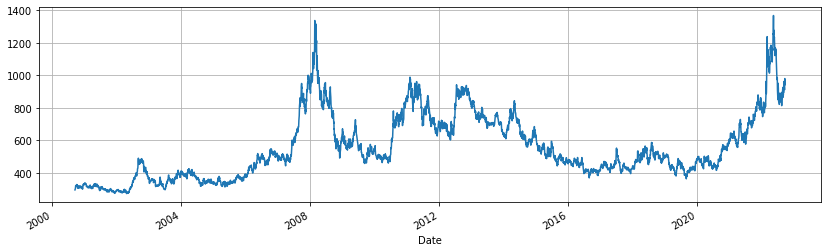

In [73]:
KC_HRW_Wheat_Futures_Dec2022['Close'].plot()
plt.show()

## Soybean

In [59]:
Soybean_Meal_Futures_Dec2022 = yf.Ticker("ZM=F")
Soybean_Meal_Futures_Dec2022 = Soybean_Meal_Futures_Dec2022.history(period='max')
Soybean_Meal_Futures_Dec2022.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-05-15,185.800003,185.800003,180.000000,183.199997,25878,0,0
2000-05-16,183.000000,183.800003,180.500000,181.500000,13486,0,0
2000-05-17,181.000000,181.699997,177.800003,179.500000,15204,0,0
2000-05-18,183.500000,185.699997,181.100006,181.600006,15204,0,0


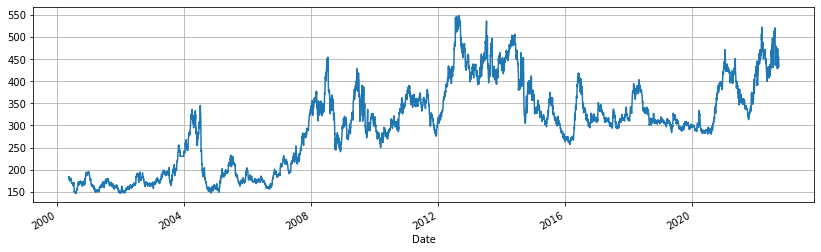

In [60]:
Soybean_Meal_Futures_Dec2022['Close'].plot()
plt.show()

# 2012–2013 North American drought -> Corn and Soybean prices spike
2012년 북미지역 가뭄으로 인해 옥수수, 대두 가격 폭등
<pre>
Corn and soybean prices rallied sharply beginning in July 2012 as U.S. drought conditions unfolded.

The 2012–2013 North American drought, an expansion of the 2010–2013 Southern United States drought, originated in the midst of a record-breaking heat wave. Low snowfall amounts in winter, coupled with the intense summer heat from La Niña, caused drought-like conditions to migrate northward from the southern United States, wreaking havoc on crops and water supply. 

As a result of drought-related crop damage, U.S. export prices for corn soared nearly 128 percent above the 20-year historical average. Export prices also hit the highest level since the BLS import and export price index series began in 1984.

In [ ]:
Corn_Futures_Dec2022.

In [122]:
corn_mean = Corn_Futures_Dec2022['Close'].mean()
corn_stdev = Corn_Futures_Dec2022['Close'].std()
print(corn_mean, corn_stdev)

400.204009009009 161.039161098021


In [124]:
low_corn_price = Corn_Futures_Dec2022[(Corn_Futures_Dec2022['Close'] > 400) & (Corn_Futures_Dec2022.index >= '20120101')]
low_corn_price[:3]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,662.0,664.25,653.0,658.5,158650,0,0
2012-01-04,658.0,661.75,653.5,658.5,142010,0,0
2012-01-05,658.0,659.75,639.5,643.5,184873,0,0


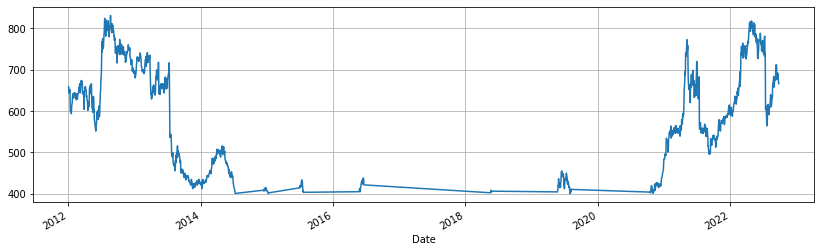

In [127]:
low_corn_price['Close'].plot()
plt.show()

# 2012-2013 : 북미 가뭄
# 2021이후 : agflation

# Corn & Soybean relationships -- 0.8

In [61]:
corn_soybean = pd.concat( [ Corn_Futures_Dec2022['Close'], Soybean_Meal_Futures_Dec2022['Close'] ], axis=1)
corn_soybean.dropna()

,Close,Close
Date,,
2000-07-17,179.25,150.800003
2000-07-18,180.75,150.600006
2000-07-19,182.00,149.000000
2000-07-20,186.00,150.399994
2000-07-21,187.75,151.699997
...,...,...
2022-09-20,692.00,450.799988
2022-09-21,685.50,454.700012
2022-09-22,688.25,445.899994


In [62]:
corn_soybean.corr()

,Close,Close
Close,1.000000,0.806364
Close,0.806364,1.000000


## Metals Futures

### Gold

In [85]:
Gold = yf.Ticker("GC=F")
Gold = Gold.history(period='max')
Gold.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,0,0,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,2,0,0


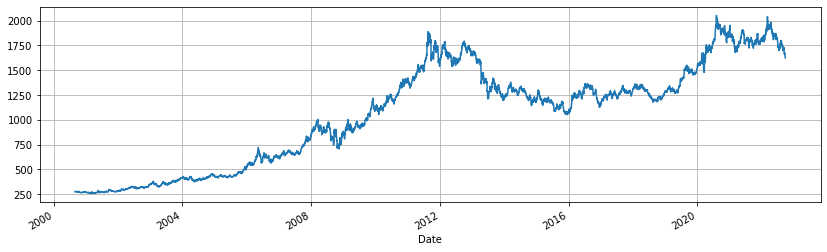

In [86]:
Gold['Close'].plot()
plt.show()

### Silver

In [92]:
Silver = yf.Ticker("SI=F")
Silver = Silver.history(period='max')
Silver.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,4.950,4.950,4.895,4.930,2319,0,0
2000-08-31,4.920,5.045,4.920,5.003,1612,0,0
2000-09-01,5.035,5.035,4.985,5.004,1375,0,0
2000-09-05,4.990,5.005,4.975,4.998,856,0,0


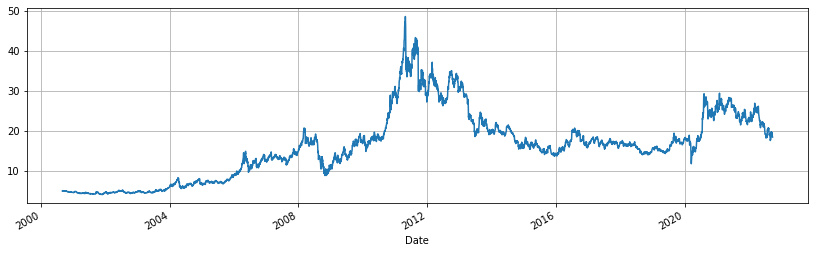

In [93]:
Silver['Close'].plot()
plt.show()

### Platinum

In [86]:
Platinum_Oct22 = yf.Ticker("PL=F")
Platinum_Oct22 = Platinum_Oct22.history(period='max')
Platinum_Oct22.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04,428.0,430.0,421.000000,429.700012,632,0,0
2000-01-05,428.0,428.0,416.899994,419.899994,571,0,0
2000-01-06,415.0,417.0,409.000000,412.000000,494,0,0
2000-01-07,408.0,417.0,408.000000,414.000000,130,0,0


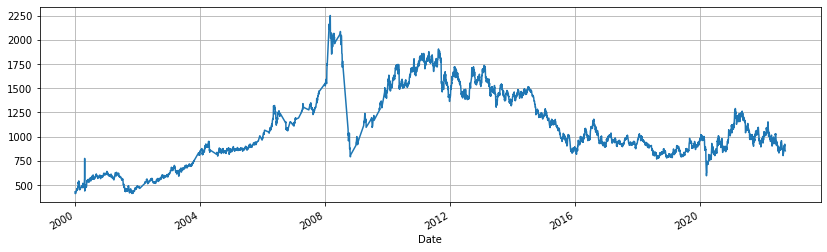

In [87]:
Platinum_Oct22['Close'].plot()
plt.show()

### Copper

In [65]:
Copper_Dec22 = yf.Ticker("HG=F")
Copper_Dec22 = Copper_Dec22.history(period='max')
Copper_Dec22.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,0.879,0.887,0.877,0.885,2886,0,0
2000-08-31,0.885,0.888,0.880,0.885,1095,0,0
2000-09-01,0.878,0.889,0.878,0.889,3449,0,0
2000-09-05,0.896,0.907,0.895,0.906,1397,0,0


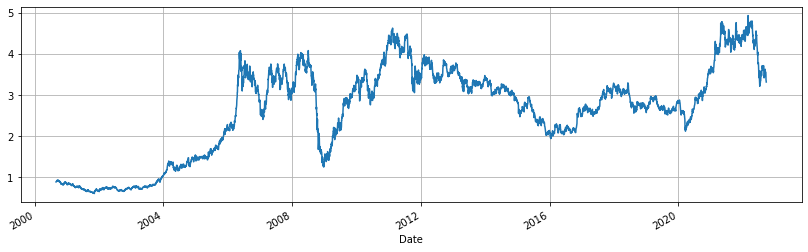

In [66]:
Copper_Dec22['Close'].plot()
plt.show()

# Doctor Copper
<pre>
구리는 건물, 자동차, 휴대폰 등 다양한 산업의 원자재로 쓰이기 때문에 가격에 경기 동향과 전망이 반영되는 경향이 있다. 이 때문에 구리는 실물경기의 가늠자로 통하며 ‘닥터 코퍼’(Dr. Copper·구리 박사)로 불린다.

The price of copper is a good barometer for the overall strength of the global economy. The greatest determinants of copper prices are emerging markets, the U.S. housing market, supply disruptions, and substitution. Because of infrastructure demand, emerging markets are a key driver of copper prices. Emerging market countries have high growth rates for housing and transportation infrastructure and other types of construction. Therefore, the price of copper is sensitive to growth rates in these countries.

The term Doctor Copper is market lingo for this base metal that is reputed to have a "Ph.D. in economics" because of its ability to predict turning points in the global economy. Because of copper's widespread applications in most sectors of the economy—from homes and factories to electronics and power generation and transmission—demand for copper is often viewed as a reliable leading indicator of economic health. This demand is reflected in the market price of copper.

In [67]:
copper_mean = Copper_Dec22['Close'].mean()
copper_stdev = Copper_Dec22['Close'].std()
print(copper_mean, copper_stdev)

2.6360994935917463 1.0972157968750451


## when the copper price > 3 --> good

In [80]:
good_economy = Copper_Dec22[(Copper_Dec22['Close'] > 3)]
good_economy.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-04-18,2.96,3.06,2.96,3.059,696,0,0


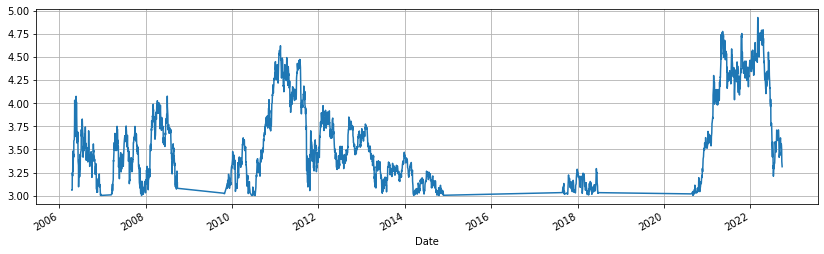

In [81]:
good_economy['Close'].plot()
plt.show()

## when the copper price < 3 --> bad

In [78]:
bad_economy = Copper_Dec22[(Copper_Dec22['Close'] < 3)]
bad_economy.head(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-08-30,0.879,0.887,0.877,0.885,2886,0,0


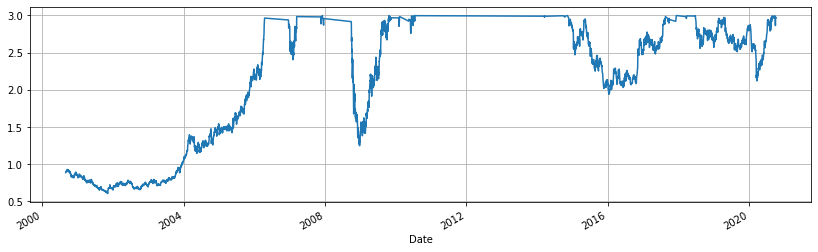

In [79]:
bad_economy['Close'].plot()
plt.show()

# Gold & Copper relationships -- 0.8

In [87]:
gold_copper = pd.concat( [ Copper_Dec22['Close'], Gold['Close'] ], axis=1)
gold_copper.dropna()

,Close,Close
Date,,
2000-08-30,0.8850,273.899994
2000-08-31,0.8850,278.299988
2000-09-01,0.8890,277.000000
2000-09-05,0.9060,275.799988
2000-09-06,0.9015,274.200012
...,...,...
2022-09-20,3.5480,1659.699951
2022-09-21,3.5120,1664.599976
2022-09-22,3.4985,1670.800049


In [89]:
gold_copper.corr()

,Close,Close
Close,1.000000,0.792163
Close,0.792163,1.000000


# Gold & Silver relationships -- 0.87

In [94]:
gold_silver = pd.concat( [ Gold['Close'], Silver['Close'] ], axis=1)
gold_silver.dropna()

,Close,Close
Date,,
2000-08-30,273.899994,4.930000
2000-08-31,278.299988,5.003000
2000-09-01,277.000000,5.004000
2000-09-05,275.799988,4.998000
2000-09-06,274.200012,4.983000
...,...,...
2022-09-20,1659.699951,19.101999
2022-09-21,1664.599976,19.410999
2022-09-22,1670.800049,19.548000


In [95]:
gold_silver.corr()

,Close,Close
Close,1.000000,0.876468
Close,0.876468,1.000000


# Bond Futures
Dec-2022

## U.S. Treasury Bond

In [99]:
US_Treasury_Bond = yf.Ticker("ZB=F")
US_Treasury_Bond = US_Treasury_Bond.history(period='max')
US_Treasury_Bond.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,98.12500,98.50000,98.09375,98.46875,45131,0,0
2000-09-22,98.09375,98.15625,98.06250,98.12500,36588,0,0
2000-09-25,98.34375,98.40625,98.34375,98.37500,38899,0,0
2000-09-26,98.78125,98.84375,98.75000,98.84375,66654,0,0


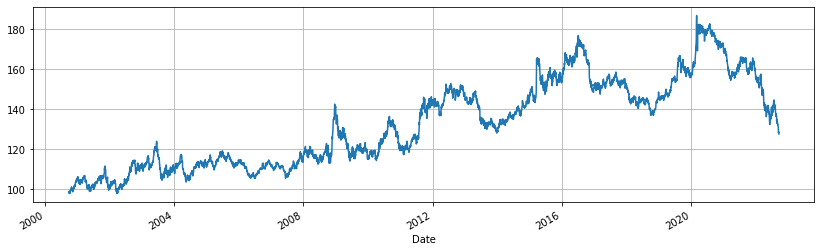

In [100]:
US_Treasury_Bond['Close'].plot()
plt.show()

## 10-Year T-Note

In [104]:
_10_Year_Treasury_Note = yf.Ticker("ZN=F")
_10_Year_Treasury_Note = _10_Year_Treasury_Note.history(period='max')
_10_Year_Treasury_Note.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,99.656250,99.953133,99.625000,99.953133,41462,0,0
2000-09-22,99.859383,99.875000,99.828133,99.828133,35044,0,0
2000-09-25,99.937500,99.968750,99.937500,99.937500,35198,0,0
2000-09-26,100.171898,100.234398,100.140602,100.187500,52999,0,0


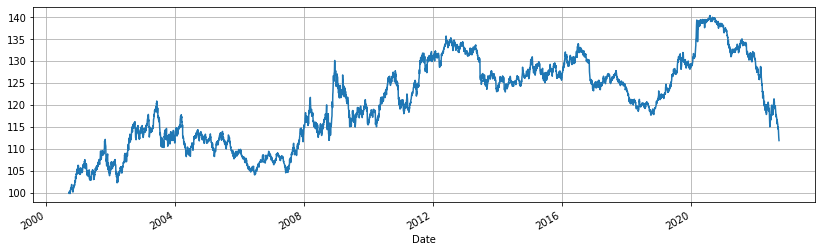

In [105]:
_10_Year_Treasury_Note['Close'].plot()
plt.show()

## 5-Year T-Note

In [98]:
_5_Year_Treasury_Note = yf.Ticker("ZF=F")
_5_Year_Treasury_Note = _5_Year_Treasury_Note.history(period='max')
_5_Year_Treasury_Note.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,100.187500,100.468803,100.171898,100.421898,10742,0,0
2000-09-22,100.296898,100.328102,100.281303,100.281303,6092,0,0
2000-09-25,100.296898,100.328102,100.296898,100.296898,6359,0,0
2000-09-26,100.437500,100.500000,100.421898,100.484398,8689,0,0


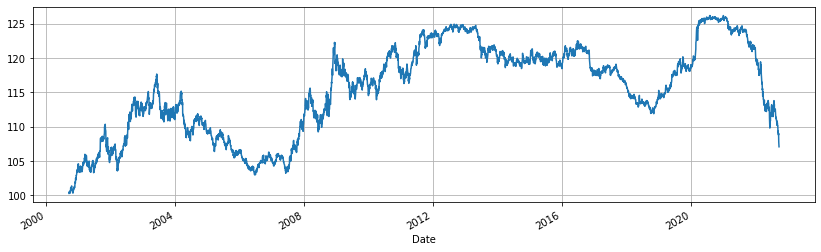

In [99]:
_5_Year_Treasury_Note['Close'].plot()
plt.show()

## 2-Year T-Note

In [110]:
_2_Year_Treasury_Note = yf.Ticker("ZF=F")
_2_Year_Treasury_Note = _2_Year_Treasury_Note.history(period='max')
_2_Year_Treasury_Note.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-09-21,100.187500,100.468803,100.171898,100.421898,10742,0,0
2000-09-22,100.296898,100.328102,100.281303,100.281303,6092,0,0
2000-09-25,100.296898,100.328102,100.296898,100.296898,6359,0,0
2000-09-26,100.437500,100.500000,100.421898,100.484398,8689,0,0


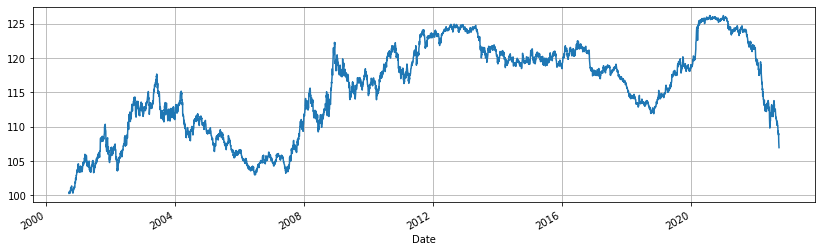

In [111]:
_2_Year_Treasury_Note['Close'].plot()
plt.show()

## US Treasury 20,10,5,1

In [194]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

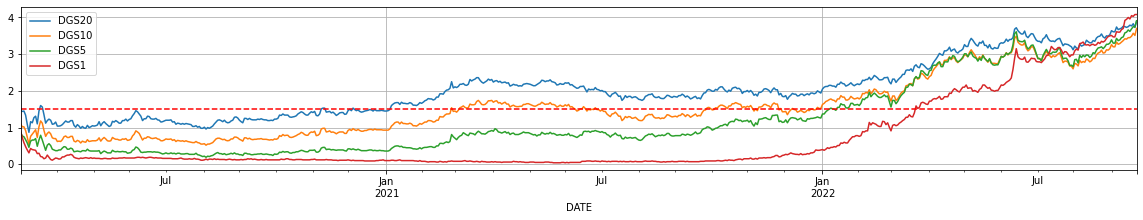

In [197]:
#미국 국채 금리(20년, 10년, 5년, 1년)
DGS = fdr.DataReader(['DGS20','DGS10','DGS5','DGS1'], start='2020-03-01', data_source='fred') 
graph= DGS.plot()
graph.axhline(1.5, ls='--', color='r')
plt.show()

## Yield Curve Inversion - 10 vs 2
금리역전 후 스프레드 격차가 심할 때 금융위기

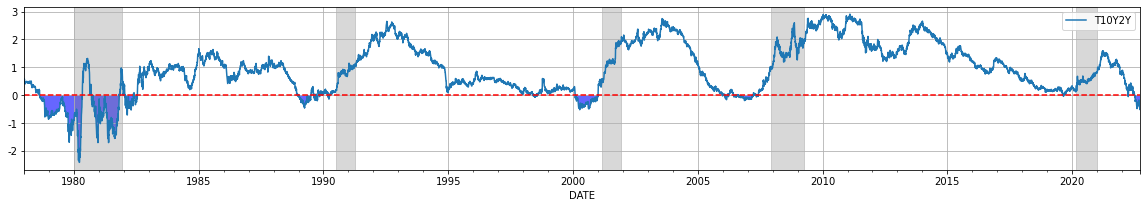

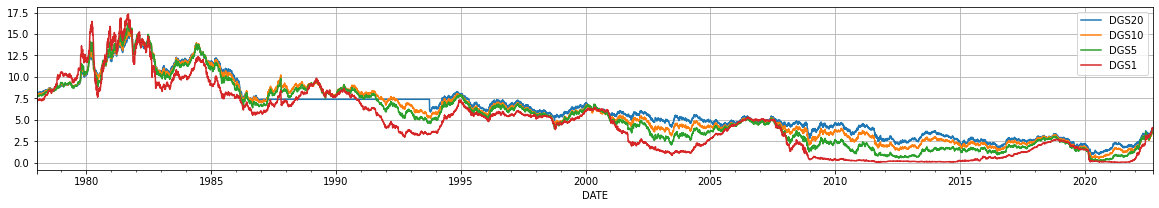

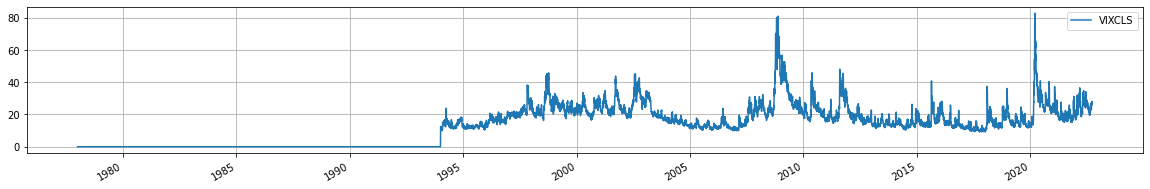

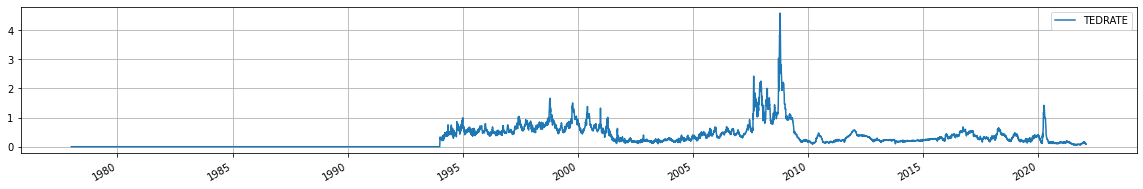

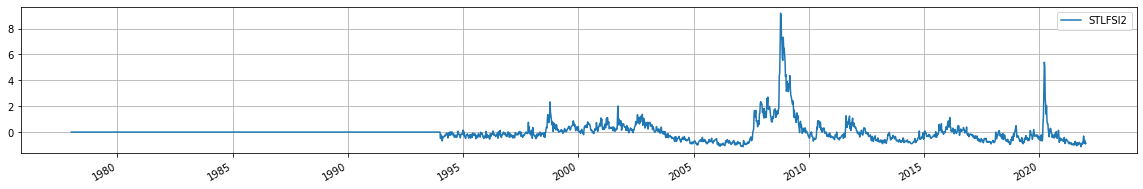

In [201]:
df102 = fdr.DataReader('T10Y2Y', start='1978-01-01', data_source='fred')
graph= df102.plot()              #장단기 금리차(T10Y2Y) 데이터 가져오기
fdr.DataReader(['DGS20','DGS10','DGS5','DGS1'], start='1978-01-01', data_source='fred').plot() 

# fdr.DataReader('USD/KRW', start='2019-01-01')#미국 달러/한국 원(원달러)

dummy = pd.DataFrame(index=pd.date_range(start='1978-01-01', end='1993-12-31'))
pd.concat([dummy, fdr.DataReader('VIXCLS',  start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #VIX(변동성 지수)
pd.concat([dummy, fdr.DataReader('TEDRATE', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #TED Spread(금융신용경색)
pd.concat([dummy, fdr.DataReader('STLFSI2', start='1994-01-01', data_source='fred')], axis=0).fillna(0).plot()   #금융스트레스 지수

graph.axhline(0, ls='--', color='r')   #0선
#graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] > 0, facecolor='r', alpha=0.6, interpolate=True)
graph.fill_between(df102.index, 0, df102['T10Y2Y'], where=df102['T10Y2Y'] <= 0, facecolor='b', alpha=0.6, interpolate=True)

#-----------------------------------------------------------------------------
#경제 위기
#-----------------------------------------------------------------------------
#1929~1933 대공항
#1974오일쇼크
graph.axvspan('1980-01-01', '1981-12-01', color='gray', alpha=0.3) #1980 시장혼란
                                                                   #1987블랙먼데이
graph.axvspan('1990-07-01', '1991-04-01', color='gray', alpha=0.3) #1991미,북유럽,일S&L(저축대부조합)금융기관 도산
                                                                   #1997~아시아부도
graph.axvspan('2001-03-01', '2001-12-01', color='gray', alpha=0.3) #2001닷컴버블,911
graph.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.3) #2008서브프라임모기지사태
graph.axvspan('2020-03-01', '2020-12-30', color='gray', alpha=0.3) #2020코로나
 
plt.show()
# 금리역전 후 스프레드 격차가 심할 때 금융위기

# 5y T-Note & Copper relationships -- 0.48
when 5y note goes high(interest rate goes down), copper price goes up

In [100]:
five_copper = pd.concat( [ _5_Year_Treasury_Note['Close'], Copper_Dec22['Close'] ], axis=1)
five_copper.dropna()

,Close,Close
Date,,
2000-09-21,100.421898,0.9255
2000-09-22,100.281303,0.9195
2000-09-25,100.296898,0.9270
2000-09-26,100.484398,0.9165
2000-09-27,100.468803,0.9125
...,...,...
2022-09-20,108.804688,3.5480
2022-09-21,109.046875,3.5120
2022-09-22,108.062500,3.4985


In [101]:
five_copper.corr()

,Close,Close
Close,1.000000,0.480389
Close,0.480389,1.000000


# 5y T-Note & Gold relationships -- 0.82
when 5y note goes high(interest rate goes down), gold price goes up

In [103]:
five_gold = pd.concat( [ _5_Year_Treasury_Note['Close'], Gold['Close'] ], axis=1)
five_gold.dropna()

,Close,Close
Date,,
2000-09-21,100.421898,270.299988
2000-09-22,100.281303,271.799988
2000-09-25,100.296898,274.100006
2000-09-26,100.484398,273.899994
2000-09-27,100.468803,278.399994
...,...,...
2022-09-20,108.804688,1659.699951
2022-09-21,109.046875,1664.599976
2022-09-22,108.062500,1670.800049


In [104]:
five_gold.corr()

,Close,Close
Close,1.000000,0.822186
Close,0.822186,1.000000


# Currencies
https://finance.yahoo.com/currencies

## USD/KRW

In [105]:
USD_KRW = yf.Ticker("KRW=X")
USD_KRW = USD_KRW.history(period='max')
USD_KRW.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,0,0,0
2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,0,0,0
2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,0,0,0
2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,0,0,0


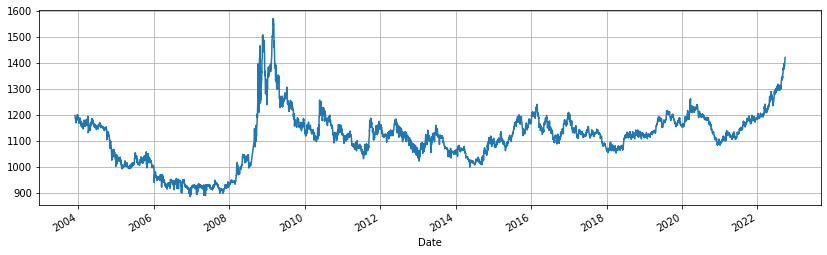

In [106]:
USD_KRW['Close'].plot()
plt.show()

## USD/CNY

In [107]:
USD_CNY = yf.Ticker("CNY=X")
USD_CNY = USD_CNY.history(period='max')
USD_CNY.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-06-25,8.2767,8.2868,8.2667,8.2768,0,0,0
2001-06-26,8.2768,8.2868,8.2668,8.2768,0,0,0
2001-07-02,8.2767,8.2870,8.2667,8.2770,0,0,0
2001-07-09,8.2768,8.2868,8.2667,8.2767,0,0,0


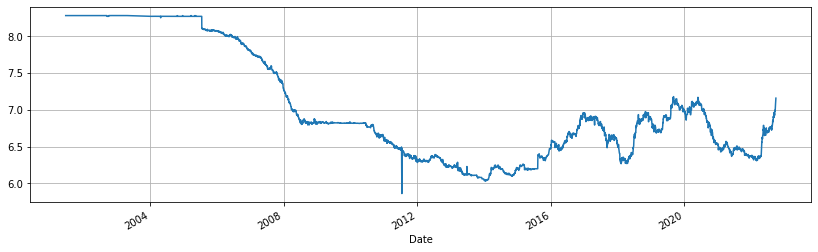

In [108]:
USD_CNY['Close'].plot()
plt.show()

## 중국 환율제도 변천과정

## CNY/KRW

In [109]:
CNY_KRW = yf.Ticker("CNYKRW=X")
CNY_KRW = CNY_KRW.history(period='max')
CNY_KRW.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-26,199.481003,200.626999,199.145004,200.378998,0,0,0


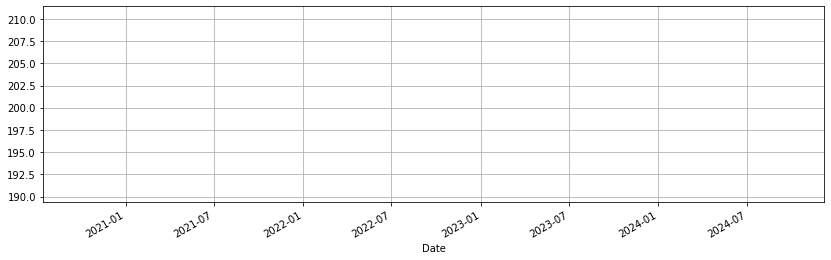

In [113]:
CNY_KRW['Close'].plot()
plt.show()

## USD/THB

In [111]:
USD_THB = yf.Ticker("THB=X")
USD_THB = USD_THB.history(period='max')
USD_THB.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2003-12-01,39.741001,40.047001,39.730999,39.889999,0,0,0
2003-12-02,39.890999,40.018002,39.765999,39.848999,0,0,0
2003-12-03,39.873001,39.974998,39.748001,39.806999,0,0,0
2003-12-04,39.757000,40.007000,39.748001,39.869999,0,0,0


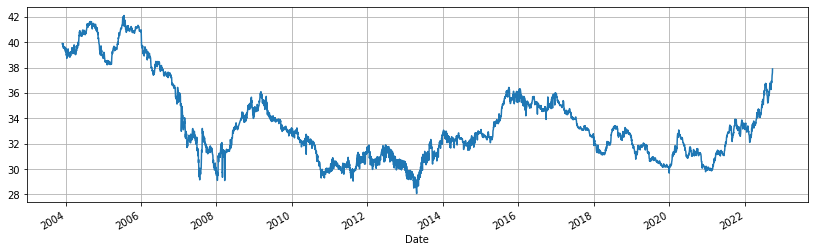

In [112]:
USD_THB['Close'].plot()
plt.show()

# USD/KRW & Copper relationship -- -0.16

In [115]:
usdkrw_copper = pd.concat( [ USD_KRW['Close'], Copper_Dec22['Close'] ], axis=1)
usdkrw_copper.dropna()

,Close,Close
Date,,
2003-12-01,1198.400024,0.9555
2003-12-02,1195.000000,0.9695
2003-12-03,1192.500000,0.9760
2003-12-04,1190.099976,0.9630
2003-12-05,1184.699951,0.9690
...,...,...
2022-09-20,1390.109985,3.5480
2022-09-21,1392.510010,3.5120
2022-09-22,1397.560059,3.4985


In [116]:
usdkrw_copper.corr()

,Close,Close
Close,1.000000,-0.164183
Close,-0.164183,1.000000


# USD/CNY & Copper relationship -- -0.67
<pre>
강달러(약위안) -> 구리가격 하락
달러 강세로 구리의 실질 가격이 상승한 점도 영향을 미쳤다. 원자재는 달러로 거래되기 때문에 강(强)달러 국면에서는 거래자의 가격 부담이 커진다. 

In [118]:
usdcny_copper = pd.concat( [ USD_CNY['Close'], Copper_Dec22['Close'] ], axis=1)
usdcny_copper.dropna()

,Close,Close
Date,,
2001-06-25,8.2768,0.7125
2001-06-26,8.2768,0.7160
2001-07-02,8.2770,0.7120
2001-07-09,8.2767,0.7015
2001-07-11,8.2769,0.7060
...,...,...
2022-09-20,7.0056,3.5480
2022-09-21,7.0172,3.5120
2022-09-22,7.0479,3.4985


In [119]:
usdcny_copper.corr()

,Close,Close
Close,1.000000,-0.673069
Close,-0.673069,1.000000


# Making Currencies Index

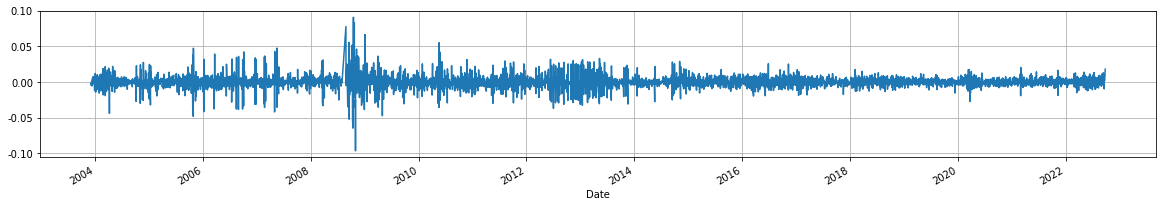

In [328]:
USD_KRW["close_pct_change"] = USD_KRW['Close'].pct_change(1) 
USD_KRW.head(1)
USD_KRW["close_pct_change"].plot()
plt.show()

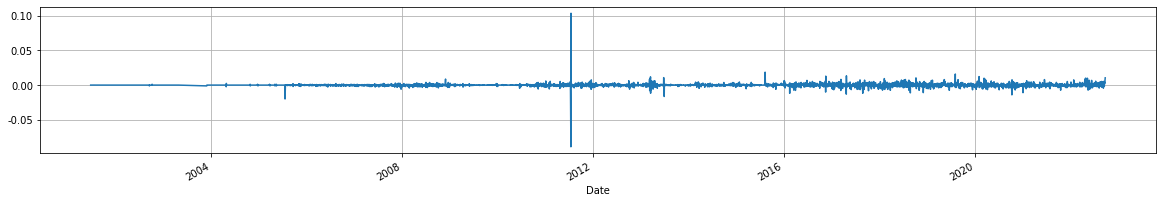

In [330]:
USD_CNY["close_pct_change"] = USD_CNY['Close'].pct_change(1) 
USD_CNY.head(1)
USD_CNY["close_pct_change"].plot()
plt.show()

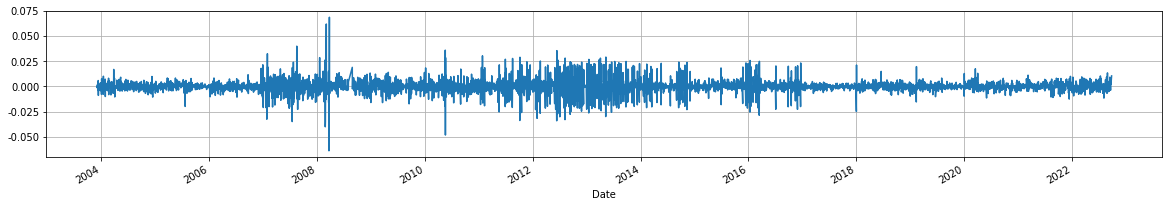

In [331]:
USD_THB["close_pct_change"] = USD_THB['Close'].pct_change(1) 
USD_THB.head(1)
USD_THB["close_pct_change"].plot()
plt.show()

## Asian Financial Crisis

# KRX

In [132]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.34'

## KODEX 200

In [135]:
KODEX_200 = fdr.DataReader('069500', '2000')
KODEX_200.head(4)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-14,5420,5558,5271,5400,3698184,NaN
2002-10-15,5457,5544,5351,5533,3284253,0.024630
2002-10-16,5588,5588,5495,5557,2926064,0.004338
2002-10-17,5544,5686,5470,5634,3001584,0.013856


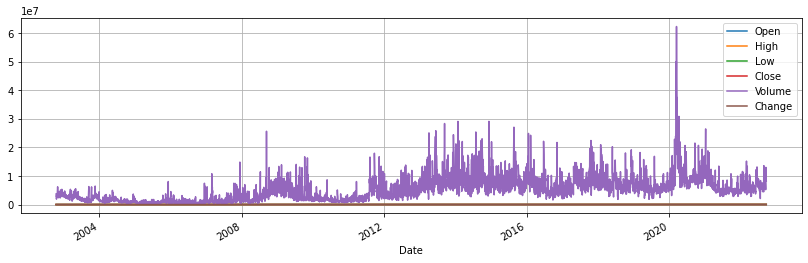

In [136]:
KODEX_200.plot()
plt.show()

# Korea Bond

In [140]:
from pykrx import bond

In [141]:
bond = bond.get_otc_treasury_yields("20220919")
print(bond)

                      수익률     대비
채권종류                            
국고채 1년              3.194 -0.017
국고채 2년              3.764  0.018
국고채 3년              3.759 -0.008
국고채 5년              3.782  0.015
국고채 10년             3.794  0.022
국고채 20년             3.668  0.000
국고채 30년             3.608  0.022
국민주택 1종 5년          3.875  0.023
회사채 AA-(무보증 3년)     4.751 -0.007
회사채 BBB- (무보증 3년)  10.609 -0.005
CD(91일)             2.990  0.020


## 국고채1년

In [167]:
#! pip install -U finance-datareader

In [165]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.34'

In [193]:
from pykrx import bond

# # 국고채1년, 국고채3년, 국고채5년, 국고채10년, 국고채20년, 국고채30년, 국민주택1종5년, 회사채AA-, 회사채BBB-
df = bond.get_otc_treasury_yields("20100104", "20220204", "국고채2년")
print(df.h())

              수익률     대비
일자                      
2021-03-10  1.013  1.013
2021-03-11  0.985 -0.028
2021-03-12  0.990  0.005
2021-03-15  0.983 -0.007
2021-03-16  0.904 -0.079


# Korea Bank

## PCI

생산자물가지수[Producers Price Index]
국내 생산자가 국내(내수)시장에 공급하는 상품의 가격 및 서비스의 요금을 경제에서 차지하는 중요도를 고려하여 평균한 종합적인 가격수준을 지수화한 통계

In [247]:
df = pd.read_csv('./생산자물가지수(기본분류)_26170314.csv')
# 총지수
# 2015=100
# 가중치 1000

In [249]:
df.head()

,통계표,계정코드,단위,가중치,변환,2000/01,2000/02,2000/03,2000/04,2000/05,...,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,2022/05,2022/06,2022/07,2022/08
0,4.1.1.1. 생산자물가지수(기본분류),총지수,2015=100,1000.0,원자료,78.77,78.57,78.52,78.14,77.95,...,113.23,113.21,114.4,114.95,116.7,118.59,119.43,120.1,120.44,120.12


In [250]:
tdf = df.T

In [251]:
tdf.head(6)

,0
통계표,4.1.1.1. 생산자물가지수(기본분류)
계정코드,총지수
단위,2015=100
가중치,1000.0
변환,원자료
2000/01,78.77


In [254]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 통계표 to 2022/08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       277 non-null    object
dtypes: object(1)
memory usage: 12.4+ KB


In [255]:
PCI = tdf.drop(['통계표', '계정코드', '단위', '가중치', '변환'], axis=0, inplace=True)

# World Indicies
https://finance.yahoo.com/world-indices

## S&P 500

In [120]:
SnP_500 = yf.Ticker("^GSPC")
SnP_500 = SnP_500.history(period='max')
SnP_500.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0


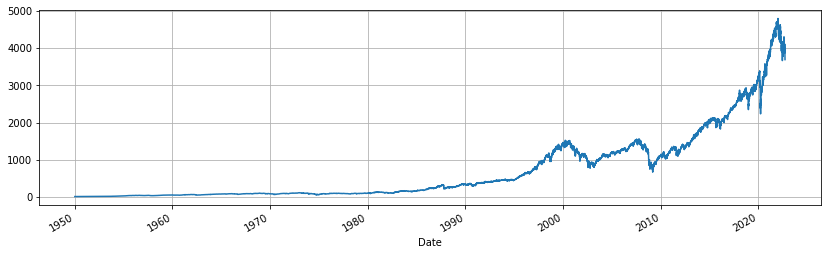

In [117]:
SnP_500['Close'].plot()
plt.show()

## Dow Jones Industrial Average

In [121]:
DJIA = yf.Ticker("^DJI")
DJIA = DJIA.history(period='max')
DJIA.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1992-01-02,3152.100098,3172.629883,3139.310059,3172.399902,23550000,0,0
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,23620000,0,0
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,27280000,0,0
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,25510000,0,0


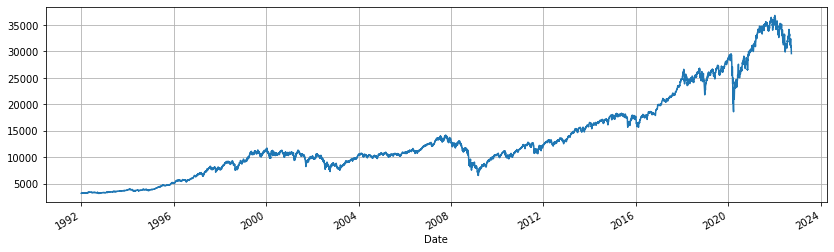

In [122]:
DJIA['Close'].plot()
plt.show()

## NASDAQ

In [124]:
NASDAQ = yf.Ticker("^IXIC")
NASDAQ = NASDAQ.history(period='max')
NASDAQ.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,0,0,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,0,0,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,0,0,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,0,0,0


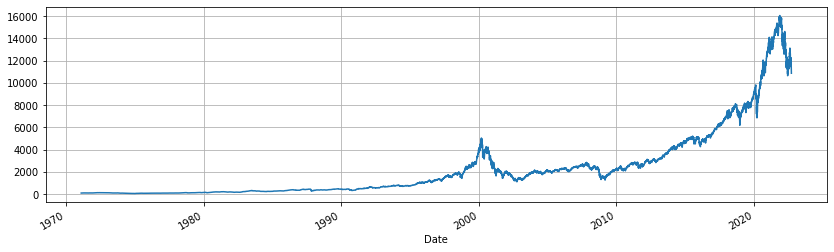

In [125]:
NASDAQ['Close'].plot()
plt.show()

## HANG SENG INDEX

In [127]:
HANG_SENG = yf.Ticker("^HSI")
HANG_SENG = HANG_SENG.history(period='max')
HANG_SENG.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,0,0,0
1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,0,0,0
1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,0,0,0
1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,0,0,0


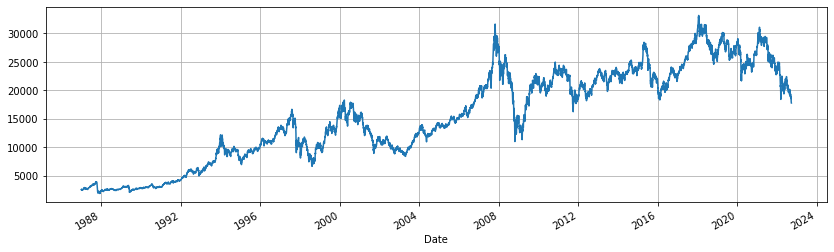

In [128]:
HANG_SENG['Close'].plot()
plt.show()

## VIX

In [130]:
VIX = yf.Ticker("^VIX")
VIX = VIX.history(period='max')
VIX.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,0,0,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,0,0,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,0,0,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,0,0,0


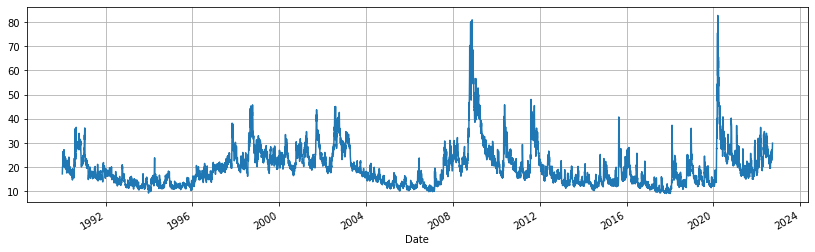

In [131]:
VIX['Close'].plot()
plt.show()